# Apriori Algorithm in Machine Learning

- The Apriori algorithm uses frequent itemsets to generate association rules, and it is designed to work on the databases that contain transactions. 
- With the help of these association rule, it determines how strongly or how weakly two objects are connected.
- This algorithm uses a breadth-first search and Hash Tree to calculate the itemset associations efficiently. 
- It is the iterative process for finding the frequent itemsets from the large dataset.
- This algorithm was given by the R. Agrawal and Srikant in the year 1994. 
- It is mainly used for market basket analysis and helps to find those products that can be bought together. 
- It can also be used in the healthcare field to find drug reactions for patients.

What is Frequent Itemset?

Frequent itemsets are those items whose support is greater than the threshold value or user-specified minimum support. It means if A & B are the frequent itemsets together, then individually A and B should also be the frequent itemset.
Suppose there are the two transactions: A= {1,2,3,4,5}, and B= {2,3,7}, in these two transactions, 2 and 3 are the frequent itemsets.

Note: To better understand the apriori algorithm, and related term such as support and confidence, it is recommended to understand the association rule learning.

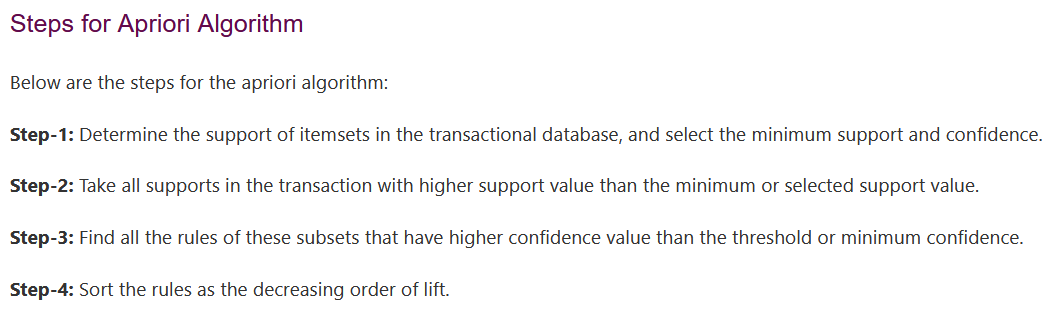

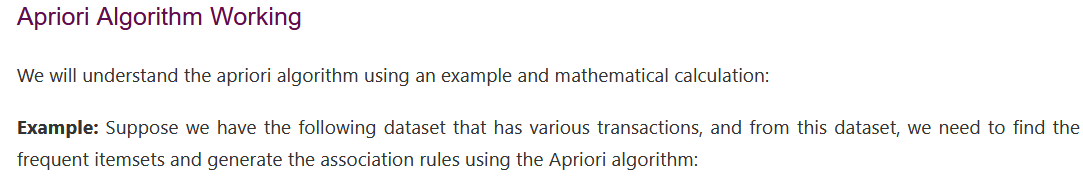

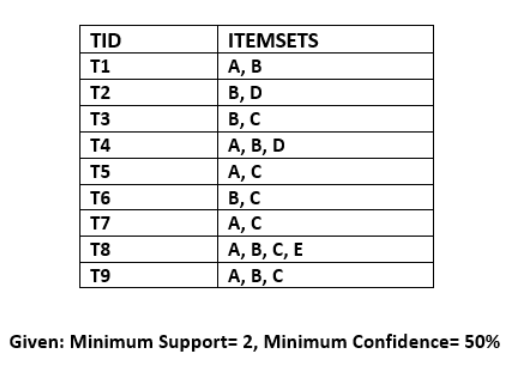

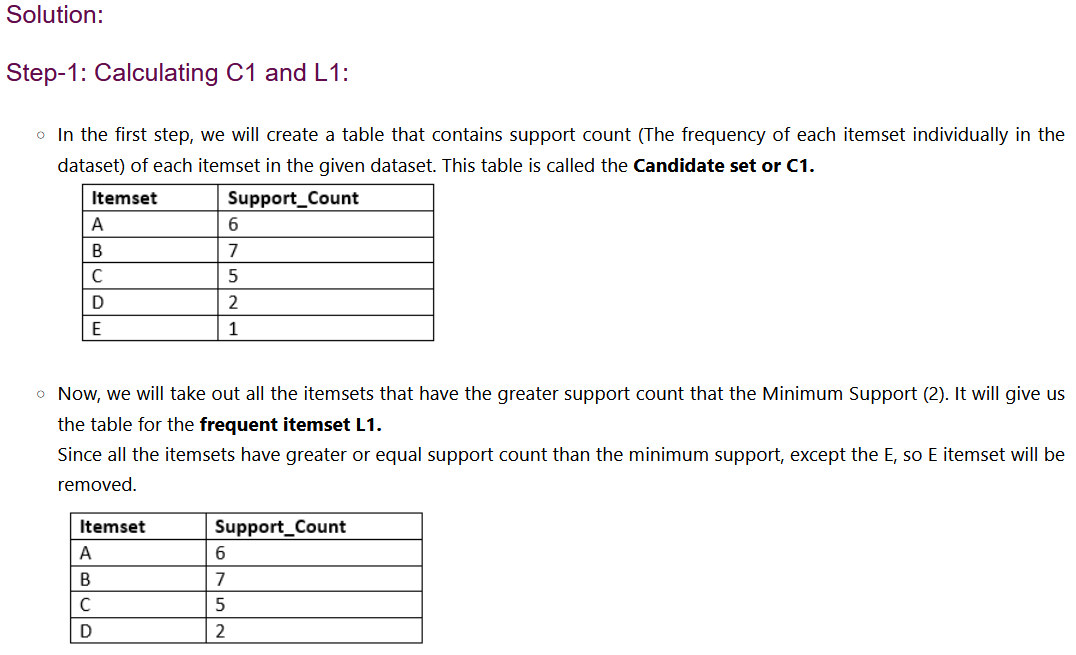

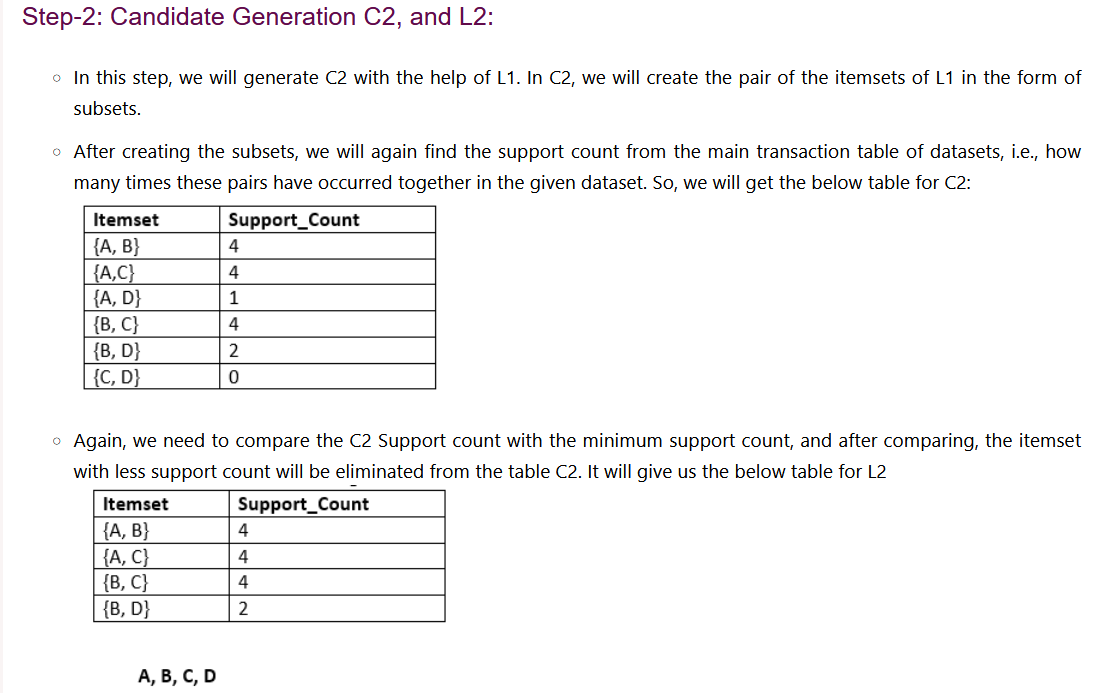

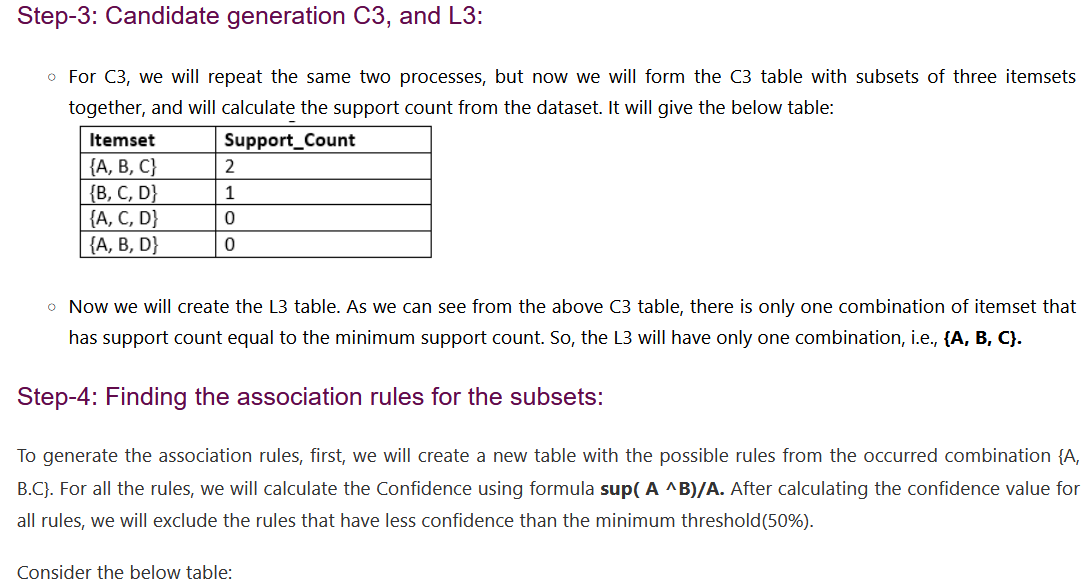

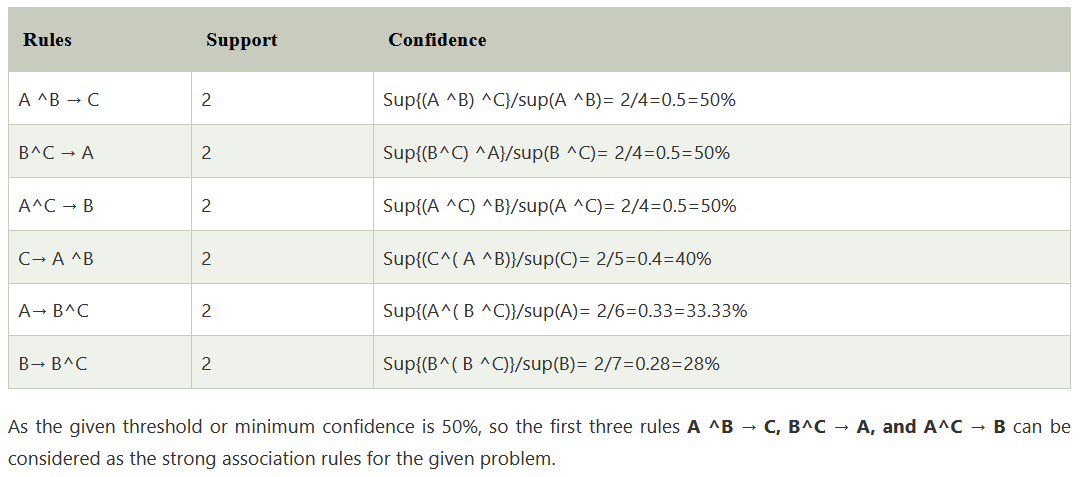

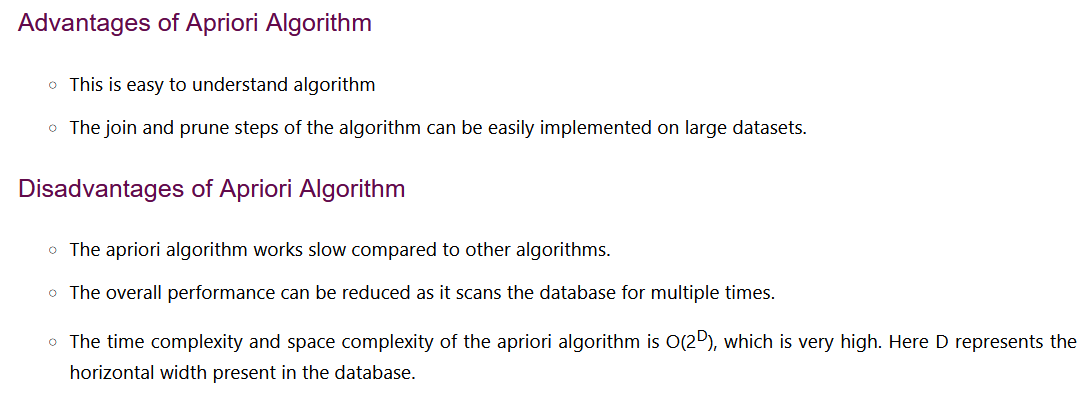

Association Rule Learning (APL) using scikit-learn

## Content:
### 1. Apriori
### 2. Eclat

# Apriori
Informal definition: "Customer who bought this will also buy..." --> Apriori algorithm figures this out. This is used for optimization of combination of things.

**Definition of terms**

1) Support
![i98798](https://i.imgur.com/KeZbncP.png)

2) Confidence
![i9878868](https://i.imgur.com/ji53xXW.png)

3) Lift
![i234](https://i.imgur.com/RLrYFwV.png)

**Steps**

![i99](https://i.imgur.com/rNd604p.png)

Companies like Amazon and Netflix does use this algorithm, but they have more sophisticated custom-made algorithms. But Apriori algorithm is a great standard algorithm for optimization. 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None) #To make sure the first row is not thought of as the heading
dataset.shape

#Transforming the list into a list of lists, so that each transaction can be indexed easier
transactions = []
for i in range(0, dataset.shape[0]):
    transactions.append([str(dataset.values[i, j]) for j in range(0, 20)])

print(transactions[0])

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']


In [17]:
len(transactions)

7501

In [6]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=ec0b272d37994ab74f3f5ad7e0f8e73a8c9f3aef5125d9fa162d347e8cb967e8
  Stored in directory: c:\users\karthick\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [18]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

In [19]:
from apyori import apriori
# Please download this as a custom package --> type "apyori"
# To load custom packages, do not refresh the page. Instead, click on the reset button on the Console.

rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)
# Support: number of transactions containing set of times / total number of transactions
# .      --> products that are bought at least 3 times a day --> 21 / 7501 = 0.0027
# Confidence: Should not be too high, as then this wil lead to obvious rules

#Try many combinations of values to experiment with the model. 

#viewing the rules
results = list(rules)

In [20]:
rules

<generator object apriori at 0x000001CE4C726CF0>

In [21]:
#Transferring the list to a table

results = pd.DataFrame(results)
results.head(5)

,items,support,ordered_statistics
0,"(light cream, chicken)",0.004533,"[((light cream), (chicken), 0.2905982905982905..."
1,"(mushroom cream sauce, escalope)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(pasta, escalope)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7..."
3,"(honey, fromage blanc)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(ground beef, herb & pepper)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."


Notice that the rows are sorted by relevance. Top ones have large support, which means the rules are strong.

# Eclat

In this model, only Support value is used, which shows how frequent a set of itmes occur. Therefore, Eclat is a simplified version of Apriori model.